# scqubits example: the current mirror qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# Current Mirror qubit

$H_\text{CM}=\sum_{i, j=1}^{2N-1}(n_{i}-n_{gi})4(E_\text{C})_{ij}(n_{j}-n_{gj})
        -\sum_{i=1}^{2N-1}E_{Ji}\cos\phi_{i}
        -E_{J2N}\cos(\sum_{i=1}^{2N-1}\phi_{i}+2\pi f)$

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
currentmirror = scq.CurrentMirror.create()

In [3]:
print(currentmirror)

CurrentMirror-------|
                    | N: 3
                    | ECB: 0.2
                    | ECJ: 7.4074074074074066
                    | ECg: 20.0
                    | EJlist: [18.95 18.95 18.95 18.95 18.95 18.95]
                    | nglist: [0. 0. 0. 0. 0.]
                    | flux: 0.0
                    | ncut: 10
                    | truncated_dim: 6
                    |
                    | dim: 4084101



**Programmatic creation**

In [14]:
N=2
currentmirror2 = scq.CurrentMirror(
    N=N,
    ECB=0.2,
    ECJ=10.0,
    ECg=20.0,
    EJlist=np.array(2*N*[20.0]),
    nglist=np.array((2*N-1)*[0.0]),
    flux=0.0,
    ncut=8,
    truncated_dim=6
)

In [15]:
print(currentmirror2)

CurrentMirror-------|
                    | N: 2
                    | ECB: 0.2
                    | ECJ: 10.0
                    | ECg: 20.0
                    | EJlist: [20. 20. 20. 20.]
                    | nglist: [0. 0. 0.]
                    | flux: 0.0
                    | ncut: 8
                    | truncated_dim: 6
                    |
                    | dim: 4913



## Computing and visualizing spectra

In [16]:
currentmirror2.eigenvals()

array([23.47461313, 28.60900622, 28.61159758, 33.62911959, 33.65246509,
       33.73810251])

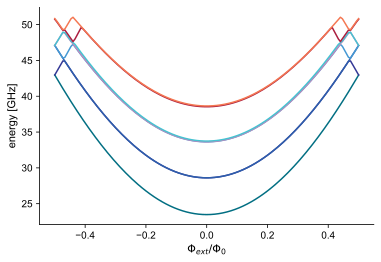

In [17]:
flux_list = np.linspace(-0.5, 0.5, 151)
currentmirror2.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

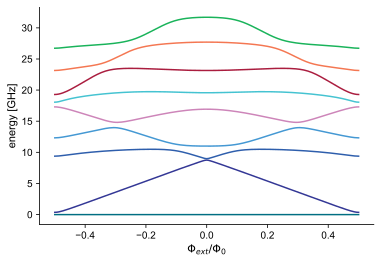

In [7]:
currentmirror2.plot_evals_vs_paramvals('flux', flux_list, evals_count=9, subtract_ground=True);

## Matrix elements
The current mirror qubit has a variable number of degrees of freedom, depending on the number of big capacitors $N$. Therefore in order to specify which operator we would like to compute matrix elements of, we must pass the argument `dof_index` to operators `exp_i_phi_operator` and `n_operator`. This is done by passing `operator_args` to `matrixelement_table`, a dictionary of the arguments we want passed to the operator in question.

In [20]:
expiphi2mat = currentmirror2.matrixelement_table('exp_i_phi_operator',
                                                evals_count=10, 
                                                operator_args={'dof_index': 2})

print(expiphi2mat)

[[ 8.46975678e-01+1.50400525e-15j -8.20587923e-02+2.17844396e-01j
  -3.27960653e-09+1.52778347e-09j -3.07887979e-02-3.52259638e-02j
   4.02499194e-03+4.82728521e-03j -1.22632808e-07+6.90977249e-08j
   7.29692278e-03+5.64047300e-03j  5.35373447e-08+1.44583723e-09j
  -1.39141744e-07+5.43484205e-08j  2.88664665e-04-1.86337965e-05j]
 [ 8.20587923e-02+2.17844396e-01j  7.79179242e-01-3.70536934e-15j
   9.73937004e-08+9.44074043e-08j -1.48258058e-01+2.76445874e-01j
   2.66729221e-02-4.70713887e-02j  3.61009779e-08+3.02210977e-08j
   2.36875952e-02-7.71744073e-02j -1.80699856e-07-5.22014185e-07j
   8.14063622e-07+9.04859841e-07j  2.96377992e-04+6.55365082e-04j]
 [ 3.27960420e-09+1.52778473e-09j  9.73936970e-08-9.44073844e-08j
   8.44530612e-01-8.32667268e-16j  2.11982495e-08+7.42702314e-08j
   3.31044989e-09+1.27441178e-08j  2.31638072e-01-1.68387648e-02j
  -3.20719541e-07-6.27949367e-07j -5.48453773e-03-2.76904364e-03j
   4.68081067e-02+3.19592016e-03j -8.96086067e-07-3.53845056e-07j]
 [-3.07

In [21]:
n1mat = currentmirror2.matrixelement_table('n_operator',
                                           evals_count=10, 
                                           operator_args={'dof_index': 1})
print(n1mat)

[[-2.06501483e-14+0.00000000e+00j -2.13475745e-10+2.88536631e-11j
   1.80243692e+00-1.95521445e-01j  3.52426421e-14-9.78210568e-15j
  -6.90003610e-14-8.32667268e-16j -7.61196661e-15+4.36595204e-14j
  -4.82038906e-14+1.20005820e-15j -2.54701415e-02+2.60302089e-03j
  -9.55053955e-05+1.25859726e-04j -3.09300342e-14-4.63604211e-14j]
 [-2.13475756e-10-2.88536637e-11j  6.05071548e-15+0.00000000e+00j
   4.89053242e-14+9.60342916e-15j  4.70895296e-11+1.57423507e-11j
   1.81850512e-10-2.38293041e-10j -8.58946515e-01-1.59504601e+00j
  -2.49314458e-14+1.31561428e-14j  2.41057174e-14-3.79314635e-14j
  -2.12052598e-14-9.82547377e-15j  1.41553436e-14+1.22124533e-15j]
 [ 1.80243692e+00+1.95521445e-01j  4.89330798e-14-9.58955138e-15j
  -1.03250741e-13+1.11022302e-16j -4.05112209e-01-1.32059567e-01j
  -1.51182857e+00+1.98359523e+00j -1.28645631e-10-2.63493168e-10j
   4.89053242e-14+5.09592368e-14j  5.59552404e-14+9.90318938e-14j
   4.85445018e-14-4.15500967e-14j  4.89192020e-15-1.16573418e-14j]
 [ 3.52

The default argument is `dof_index=0`, which we make use of here

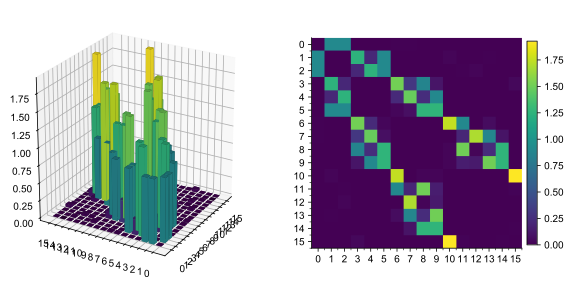

In [22]:
currentmirror2.plot_matrixelements('n_operator', evals_count=16);

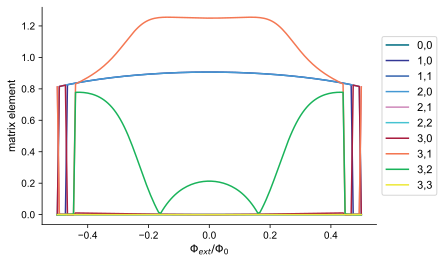

In [23]:
currentmirror2.plot_matelem_vs_paramvals('n_operator', 'flux', flux_list, select_elems=4);